# Computer vision pipeline

A computer vision pipeline is a series of steps that most computer vision applications will go through. Many vision applications start off by acquiring images and data, then processing that data, performing some analysis and recognition steps, then finally performing an action. The general pipeline and a specific example of a pipeline applied to facial expression recognition is pictured below.

![Face recognition pipeline](images/face_recognition_pipeline.png)

### Standardizing Data

Pre-processing images is all about standardizing input images so that you can move further along the pipeline and analyze images in the same way. In machine learning tasks, the pre-processing step is often one of the most important. For example, for a traffic sign classification task:

![Traffic sign](images/traffic_sign_classification.png)

If the images are different sizes, or even cropped differently, then this counting tactic will likely fail. So, it's important to pre-process these images so that they are standardized before they move along the pipeline. In the example below, you can see that the images are pre-processed into a standard square size.

The algorithm counts up the number of red pixels in a given image and if there are enough of them, it classifies an image as a stop sign. In this example, we are just extracting a color feature and skipping over selecting an area of interest (we are looking at the whole image). In practice, you'll often see a classification pipeline that looks like this:

![Correct Traffic classification](images/traffic_sign_classification_2.png)

# Images as Grids of Pixels

Every image consists of a set of pixels. Pixels are the raw building blocks of an image. Normally, we think of a pixel as the “color” or the “intensity” of light that appears in a given place in our image.

If we think of an image as a grid, each square in the grid contains a single pixel.

For example, let’s pretend we have an image with a resolution of 500 × 300. This means that our image is repre-sented as a grid of pixels, with 500 rows and 300 columns. Overall, there are 500 × 300 = 150, 000 pixels in our image.

Most pixels are represented in two ways: grayscale and color. In a grayscale image, each pixel has a value between 0 and 255, where zero corresponds to “black” and 255 corresponds to “white”. The values in between 0 and 255 are varying shades of gray, where values closer to 0 are darker and values closer to 255 are lighter.

Color pixels are normally represented in the RGB color space – one value for the Red component, one for Green, and one for Blue. Other color spaces exist, but let’s start with the basics and move our way up from there.

Each of the three colors is represented by an integer in the range 0 to 255, which indicates how “much” of the color there is. Given that the pixel value only needs to be in the range [0, 255], we normally use an 8-bit unsigned integer to represent each color intensity.

We then combine these values into an RGB tuple in the form (red, green, blue). This tuple represents our color. To construct a white color, we would fill up each of the red, green, and blue buckets completely, like this: (255, 255,255). Then, to create a black color, we would empty each of the buckets out: (0,0,0). To create a pure red color, we would fill up the red bucket (and only the red bucket) up completely: (255,0,0)

### Import resources

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # computer vision library

%matplotlib inline

### Read in and display the image

It’s important to note that OpenCV stores RGB channels in reverse order. While we normally think in terms of Red, Green, and Blue, OpenCV actually stores them in the order of Blue, Green, and Red. This is important to note since it could cause some confusion later.

Image dimensions: (427, 640, 3)
Image dimensions: (427, 640, 3)


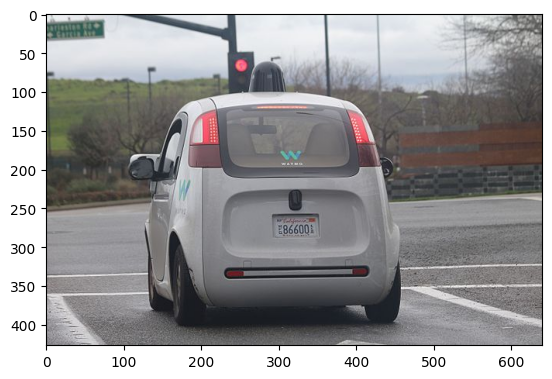

In [4]:
# Read in the image
image = cv2.imread('images/waymo_car.jpg')

# Print out the image dimensions
print('Image dimensions:', image.shape)

# Convert image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
print('Image dimensions:', image_rgb.shape)

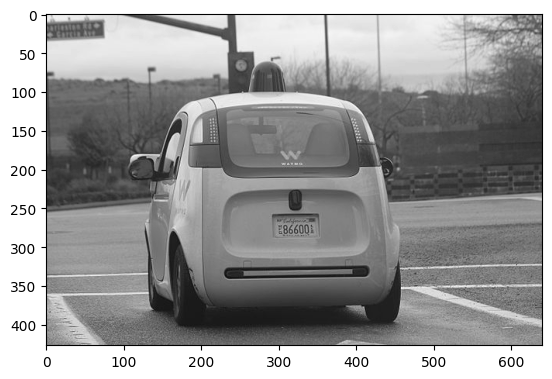

In [6]:
# Change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# plt.imshow(image_rgb)
plt.imshow(gray_image, cmap='gray')

OpenCV represents images as NumPy arrays. Conceptually, we can think of this representation as a matrix. In order to access a pixel value, we just need to supply the x and y coordinates of the pixel we are interested in.

In [9]:
# Print specific grayscale pixel values

x = 400
y = 300

print("Color image values: Pixels are represented as a tuple")
print(image_rgb[y,x])
print(image_rgb[0][0:10])
print(image_rgb[0, 0:10])

print("\nGrayscale Image values: Pixels are represented as integers")
print(gray_image[y,x])
print(gray_image[0][0:10])
print(gray_image[0, 0:10])

Color image values: Pixels are represented as a tuple
[159 158 163]
[[237 237 239]
 [235 235 237]
 [236 236 238]
 [240 240 242]
 [238 238 240]
 [222 222 224]
 [191 191 193]
 [166 166 168]
 [219 219 221]
 [240 240 242]]
[[237 237 239]
 [235 235 237]
 [236 236 238]
 [240 240 242]
 [238 238 240]
 [222 222 224]
 [191 191 193]
 [166 166 168]
 [219 219 221]
 [240 240 242]]

Grayscale Image values: Pixels are represented as integers
160
[238 236 237 241 239 223 192 167 220 241]
[238 236 237 241 239 223 192 167 220 241]


In [4]:
#Find the maximum and minimum grayscale values in this image

max_val = np.amax(gray_image)
min_val = np.amin(gray_image)

print('Max: ', max_val)
print('Min: ', min_val)

Max:  255
Min:  3


[[141 141 141 ... 126 125 125]
 [142 142 142 ... 126 126 126]
 [143 143 142 ... 127 127 126]
 ...
 [144 144 143 ... 134 135 135]
 [145 145 144 ... 137 137 137]
 [147 146 146 ... 140 140 140]]


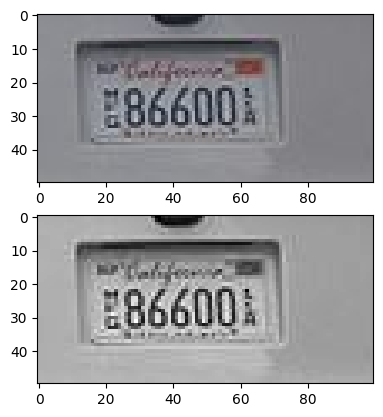

In [13]:
# Display a specific part of the image

sub_image = gray_image[250:300, 280:380]
print(sub_image)

f, (color_ax, gray_ax) = plt.subplots(2, 1)

gray_ax.imshow(sub_image, cmap='gray')
color_ax.imshow(image_rgb[250:300, 280:380])

We can use array slices to change the color of a region of pixels. We will set a the region of the top left square to have a value of (0, 255, 0) (green).



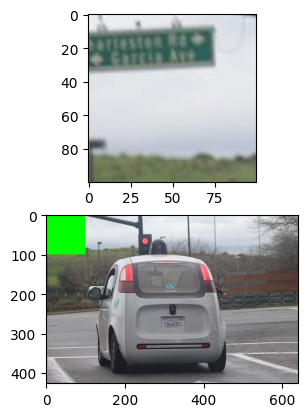

In [16]:
image_replace = image_rgb.copy()

f, (corner_ax, image_replace_ax) = plt.subplots(2, 1)

top_corner = image_replace[0:100, 0:100]
corner_ax.imshow(top_corner)

image_replace[0:100, 0:100] = (0, 255, 0)

image_replace_ax.imshow(image_replace)

### Images from numpy arrays

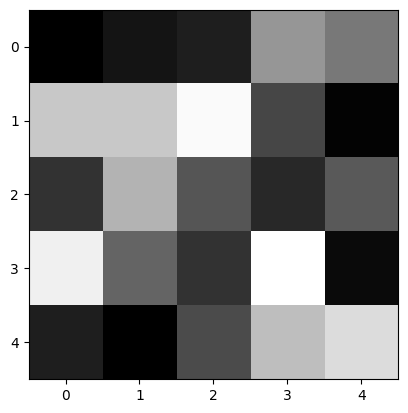

In [6]:
# Create a 5x5 image using just grayscale, numerical values
tiny_image = np.array([[0, 20, 30, 150, 120],
                      [200, 200, 250, 70, 3],
                      [50, 180, 85, 40, 90],
                      [240, 100, 50, 255, 10],
                      [30, 0, 75, 190, 220]])

plt.imshow(tiny_image, cmap='gray')

### Challenge

Modify the following cell to produce the following image:

![Gradient](images/gradient.png)

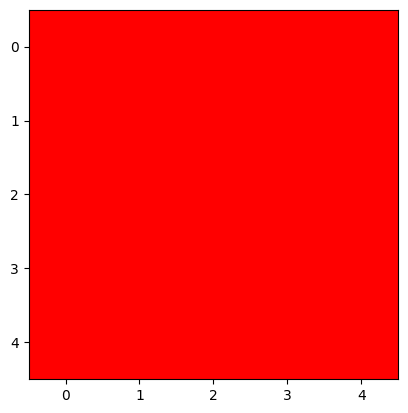

In [21]:
# This code displays an image where all the pixels are red. Modify it so that the pixels create a gradient to white. 
gradient_size = 5
gradient = np.zeros((gradient_size, gradient_size, 3), dtype=np.uint8)

for x in range(gradient.shape[0]):
    for y in range(gradient.shape[1]):
        gradient[y, x, 0] = 255

plt.imshow(gradient, cmap='gray')